In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

# Read data

In [6]:
pca_channel_breakdown = pd.read_csv('PCA_wo_resampled.csv')
pca_all_channel = pd.read_csv('PCA_C6_ALL.csv')
pca_c_spectral = pd.read_csv('PCA_wo_resampled_C_spectral.csv')
#pca_d_spectral = pd.read_csv('PCA_C6_EEG_D_spectral.csv')

cebra_channel_breakdown = pd.read_csv('CEBRA_wo_resampled.csv')
cebra_all_channel = pd.read_csv('CEBRA_D8_U256_ALL.csv')
cebra_c_spectral = pd.read_csv('CEBRA_wo_resampled_C_spectral.csv')
#cebra_d_spectral = pd.read_csv('CEBRA_D8_U256_EEG_D_spectral.csv')

# Read rand index results
aduio_ari = pd.read_csv('../aduio_ari.csv')
print('mean:',aduio_ari['ari'].mean(), 'max:', aduio_ari['ari'].max(), 'min:', aduio_ari['ari'].min())

high_c = aduio_ari[aduio_ari['ari'] > aduio_ari['ari'].mean()]
low_c = aduio_ari[aduio_ari['ari'] <= aduio_ari['ari'].mean()]
print(len(high_c), len(low_c))

mean: 0.34038798576560975 max: 0.6732360097 min: 0.01374570447
18 23


# Compare across spectral features

/Users/ccnlab/miniconda3/envs/MM/lib/python3.8/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.12156862745098039, 0.4666666666666667, 0.7058823529411765)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/ccnlab/miniconda3/envs/MM/lib/python3.8/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((1.0, 0.4980392156862745, 0.054901960784313725)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/ccnlab/miniconda3/envs/MM/lib/python3.8/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.17254901960784313, 0.6274509803921569, 0.17254901960784313)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolo

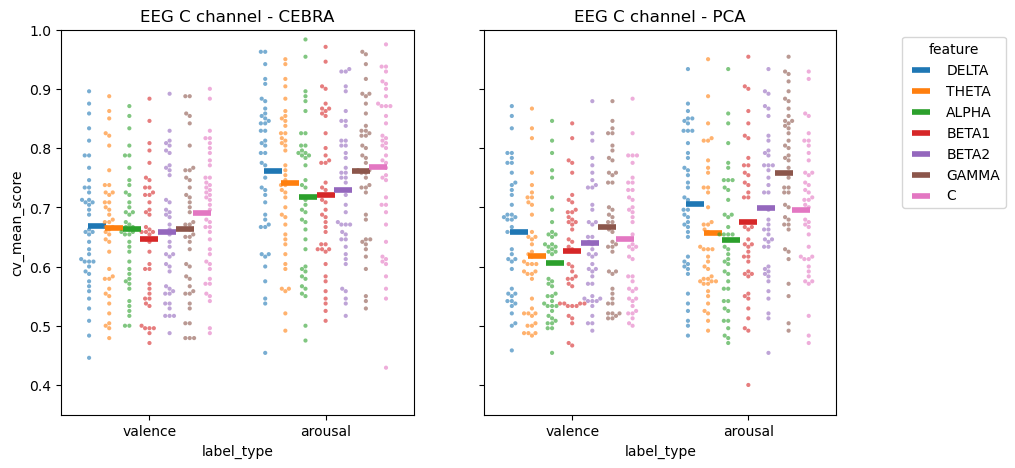

In [7]:
filtered_channel = 'C'
cebra_result = pd.concat(
    [
        cebra_c_spectral,
        cebra_channel_breakdown[cebra_channel_breakdown["channel"].isin([filtered_channel])],
    ]
)
pca_result = pd.concat(
    [
        pca_c_spectral,
        pca_channel_breakdown[pca_channel_breakdown["channel"].isin([filtered_channel])],
    ]
)

fig, axes = plt.subplots(
    nrows=1,
    sharey=True,
    ncols=2,
    figsize=(2 * 5, 1 * 5),
)
for idx, (method, result) in enumerate([("CEBRA", cebra_result), ("PCA", pca_result)]):
    title = f"EEG {filtered_channel} channel - {method}"  #
    g = sns.swarmplot(
        data=result,
        x="label_type",
        y="cv_mean_score",
        hue="channel",
        alpha=0.6,
        dodge=True,
        legend=False,
        size=3,
        ax=axes.flat[idx],
    )
    g.set_ylim((0.35, 1))
    
    df_means = (
        result.groupby(["label_type", "channel"])["cv_mean_score"]
        .agg("mean")
        .reset_index()
    )
    pp = sns.pointplot(
        x="label_type",
        y="cv_mean_score",
        data=df_means,
        hue="channel",
        dodge=0.6,
        linestyles="",
        errorbar=None,
        scale=2,
        markers="_",
        ax=axes.flat[idx],
        hue_order=[
            "DELTA",
            "THETA",
            "ALPHA",
            "BETA1",
            "BETA2",
            "GAMMA",
            filtered_channel,
        ],
        order=["valence", "arousal"],
    )

    axes.flat[idx].get_legend().set_visible((idx == 1))
    if idx == 1:
        axes.flat[idx].get_legend().set_title('feature')
        sns.move_legend(pp, "upper right", bbox_to_anchor=(1.5, 1))

    g.set_title(title)

# Compare across channels

In [ ]:
cebra_result = pd.concat(
    [
        cebra_channel_breakdown,
        cebra_all_channel,
    ]
)
pca_result = pd.concat(
    [
        pca_channel_breakdown,
        pca_all_channel,
    ]
)

fig, axes = plt.subplots(
    nrows=1,
    sharey=True,
    ncols=2,
    figsize=(2 * 5, 1 * 5),
)
for idx, (method, result) in enumerate([("CEBRA", cebra_result), ("PCA", pca_result)]):
    title = f"EEG channel - {method}"  #
    g = sns.swarmplot(
        data=result,
        x="label_type",
        y="cv_mean_score",
        hue="channel",
        alpha=0.6,
        dodge=True,
        legend=False,
        ax=axes.flat[idx],
    )
    g.set_ylim((0.35, 1))
    
    df_means = (
        result.groupby(["label_type", "channel"])["cv_mean_score"]
        .agg("mean")
        .reset_index()
    )
    pp = sns.pointplot(
        x="label_type",
        y="cv_mean_score",
        data=df_means,
        hue="channel",
        dodge=0.6,
        linestyles="",
        errorbar=None,
        scale=2.5,
        markers="_",
        ax=axes.flat[idx],
        hue_order=["A", "B", "C", "D", "ALL"],
        order=["valence", "arousal"],
    )
    axes.flat[idx].get_legend().set_visible((idx == 1))
    if idx == 1:
        sns.move_legend(pp, "upper right", bbox_to_anchor=(1.3, 1))

    g.set_title(title)

# Consistency home - in lab breakdown

In [ ]:
fig, axes = plt.subplots(
    nrows=1,
    sharey=True,
    ncols=2,
    figsize=(2 * 5, 1 * 5),
)
for idx, (method, result) in enumerate(
    [("CEBRA", cebra_channel_breakdown), ("PCA", pca_channel_breakdown)]
):
    channel_mask = result["channel"].isin(["C"])
    result = result[channel_mask]
    result["subject"] = result["subject"].astype(int)

    consistency_level = []
    for s in list(result["subject"]):
        level = "high" if s in set(high_c["subject"]) else "low"
        consistency_level.append(level)

    result["consistency_level"] = consistency_level

    title = f"EEG C channel - {method}"  #
    g = sns.swarmplot(
        data=result,
        x="label_type",
        y="cv_mean_score",
        hue="consistency_level",
        alpha=0.6,
        dodge=True,
        legend=False,
        ax=axes.flat[idx],
    )
    g.set_ylim((0.35, 1))

    df_means = (
        result.groupby(["label_type", "consistency_level"])["cv_mean_score"]
        .agg("mean")
        .reset_index()
    )
    pp = sns.pointplot(
        x="label_type",
        y="cv_mean_score",
        data=df_means,
        hue="consistency_level",
        dodge=0.4,
        linestyles="",
        errorbar=None,
        scale=2.5,
        markers="_",
        ax=axes.flat[idx],
        hue_order=["high", "low"],
        order=["valence", "arousal"],
    )
    axes.flat[idx].get_legend().set_visible((idx == 1))

    g.set_title(title)

# Attention weighted comparison

In [8]:
cebra_wo_attention = pd.read_csv('CEBRA_D8_U256_wo_weighted_attention.csv')
cebra_wo_resample = pd.read_csv('CEBRA_wo_resampled.csv')

pca_wo_attention = pd.read_csv('PCA_C6_wo_weighted_attention.csv')
pca_wo_resample = pd.read_csv('PCA_wo_resampled.csv')

In [ ]:
import pickle

# Read dictionary pkl file
with open('./eeg_features2/mean_validation_score.pkl', 'rb') as fp:
    mean_validation_score = pickle.load(fp)
len(mean_validation_score)

In [52]:
high_atte_idx = np.where(np.array(mean_validation_score) >= 0.84)[0]
low_atte_idx = np.where(np.array(mean_validation_score) < 0.84)[0]

high_atte_subj = cebra_wo_attention['subject'].unique()[high_atte_idx]
low_atte_subj = cebra_wo_attention['subject'].unique()[low_atte_idx]
print(high_atte_subj, low_atte_subj)

[2040 2025 2046 2012 2037 2001 2039 2038 2009 2028 2021 2044 2043 2018
 2016 2042 2033 2005 2002 2032] [2013 2022 2041 2024 2006 2007 2000 2036 2031 2017 2010 2026 2019 2020
 2011 2029 2045 2034 2003 2004 2035]


In [10]:
methods = ['no resampled', 'resampled with attention']
result = {'weighted method': [], 'C channel cv mean accuracy': [], 'label': []}
pca_results = [pca_wo_resample, pca_wo_attention]
cebra_results = [cebra_wo_resample, cebra_wo_attention]
for m, data in zip(methods, cebra_results):
    channel_mask = data["channel"].isin(["C"])
    #subject_mask = data['subject'].isin(high_atte_subj)
    df_means = (
        data[channel_mask].groupby(["label_type"])["cv_mean_score"]
        .agg("mean")
        .reset_index()
    )
    for l in list(data['label_type'].unique()):
        score = df_means[df_means['label_type'] == l]["cv_mean_score"].values[0]
        result['C channel cv mean accuracy'].append(score)
        result['label'].append(l)
        result['weighted method'].append(m)

result = pd.DataFrame(result)

Text(0.5, 1.0, 'C channel cv mean accuracy')

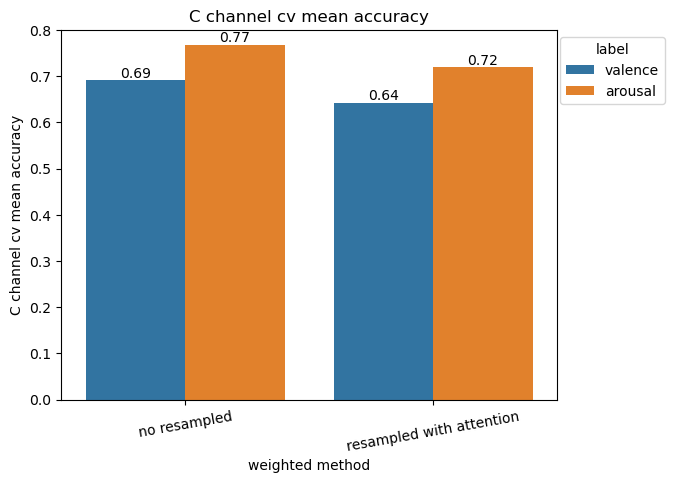

In [12]:
pp = sns.barplot(result, x="weighted method", y="C channel cv mean accuracy", hue="label")
sns.move_legend(pp, "upper right", bbox_to_anchor=(1.23, 1))
pp.set_ylim((0, 0.8))
pp.bar_label(pp.containers[0], fontsize=10, fmt="%.2f")
pp.bar_label(pp.containers[1], fontsize=10, fmt="%.2f")
pp.tick_params(axis='x', labelrotation=10)
pp.set_title('C channel cv mean accuracy')

/Users/ccnlab/miniconda3/envs/MM/lib/python3.8/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.12156862745098039, 0.4666666666666667, 0.7058823529411765)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/ccnlab/miniconda3/envs/MM/lib/python3.8/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((1.0, 0.4980392156862745, 0.054901960784313725)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/ccnlab/miniconda3/envs/MM/lib/python3.8/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.17254901960784313, 0.6274509803921569, 0.17254901960784313)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolo

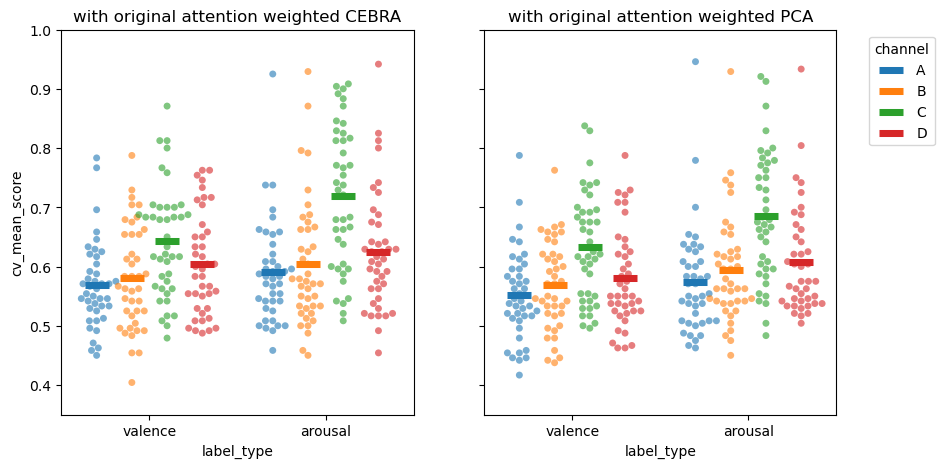

In [97]:
fig, axes = plt.subplots(
    nrows=1,
    sharey=True,
    ncols=2,
    figsize=(2 * 5, 1 * 5),
)
for idx, (method, result) in enumerate([("CEBRA", cebra_channel_breakdown), ("PCA", pca_channel_breakdown)]):
    g = sns.swarmplot(
        data=result,
        x="label_type",
        y="cv_mean_score",
        hue="channel",
        alpha=0.6,
        dodge=True,
        legend=False,
        ax=axes.flat[idx],
    )
    g.set_ylim((0.35, 1))
    
    df_means = (
        result.groupby(["label_type", "channel"])["cv_mean_score"]
        .agg("mean")
        .reset_index()
    )
    pp = sns.pointplot(
        x="label_type",
        y="cv_mean_score",
        data=df_means,
        hue="channel",
        dodge=0.6,
        linestyles="",
        errorbar=None,
        scale=2.5,
        markers="_",
        ax=axes.flat[idx],
        hue_order=["A", "B", "C", "D"],
        order=["valence", "arousal"],
    )
    axes.flat[idx].get_legend().set_visible((idx == 1))
    if idx == 1:
        sns.move_legend(pp, "upper right", bbox_to_anchor=(1.3, 1))

    g.set_title('with original attention weighted ' + method)